In [ ]:
# importar pandas
import pandas as pd

# Series

Es una versión potenciada de las listas.
* Columna de datos con un indice.
* Tipo de dato homogéneo.

In [ ]:
# crear series a partir de una lista
s = pd.Series([1, 2, 3], name="example")

s

In [ ]:
# crear series a partir de un diccionario
webster = {"Aardvark": "An animal",
           "Banana" : "A delicious fruit",
           "Cyan": "A color"}

s = pd.Series(webster)

s


Atributos de las series. Nos brindan información sobre la serie.

In [ ]:
s = pd.Series([1, 2, 3], name="example")

print(s.index) # explica como está operando el indice
print(s.values)

Métodos de las series. Modifican una serie.

In [ ]:
precios = [2.99, 4.45, 1.36]
s = pd.Series(precios)

s.sum() # suma
s.product() # producto
s.mean() # promedio
s.max() # máximo
s.min() # mínimo
s.std() # desviación estándar
s.describe() # descripción estádistica de la serie

s.head(5) # acceder a primeros n valores de la serie
s.tail(5) # acceder a últimos n valores de la serie
len(s) # longitud de la serie
s.sort_values(ascending = False) # ordenar valores

Métodos de series de tipo texto.

In [ ]:
nombres = ["santiago", "felipe", "cristian"]
s = pd.Series(nombres)

s.str.capitalize() # convertir cada inicial en mayúscula
s.str.replace("a", "A") # #remplazar texto
s.str.strip() # eliminar espacios en blanco
s.str.lower() # convertir a mayúscula
s.str.upper() # convertir a minúscula

Conversión a estructuras de datos base.

In [ ]:
precios = [2.99, 4.45, 1.36]
s = pd.Series(precios)

print(list(s))
print(dict(s))

Aplicar transformaciones.

In [ ]:
precios = [2.99, 4.45, 1.36]
s = pd.Series(precios)

# reasignar la variable
s = s.sort_values(ascending = False)

# hacer modificación in-place
s.sort_values(ascending = False, inplace = True)

Extraer valores de una serie.

In [ ]:
data = [x for x in range(100)]
s = pd.Series(data)

s[:10]

Frecuencia relativa.

In [ ]:
nombres = ["santiago", "santiago", "santiago", "felipe", "sebastian"]
s = pd.Series(nombres)

s.value_counts()

Modificar series.

In [ ]:
from random import randint

# función predefinida
def clasificar_rendimiento(numero:int):
    if numero < 50:
        return "bajo"
    elif numero < 80:
        return "medio"
    else:
        return "alto"

data = [randint(1, 100) for x in range(100)]
s = pd.Series(data)

s.apply(clasificar_rendimiento)


# función anonima con lambda
s.apply(lambda x:"bajo" if x < 50 else "medio" if x < 80 else "alto")

# Dataframes

Son un objeto que se compone de varias series. Cada serie puede ser de un tipo de dato distinto.

In [ ]:
s1 = pd.Series(["Santiago", "Felipe", "Cristian"])
s2 = pd.Series([23, 24, 25])

df = pd.DataFrame({"nombre":s1,
                   "edad":s2})

Importar y exportar datos.

In [ ]:
df = pd.read_csv("netflix_titles.csv")

df.to_excel("netflix.xlsx", index = False)

Atributos de los dataframes.

In [ ]:
df = pd.read_csv("netflix_titles.csv")

df.shape
df.dtypes
df.columns

Métodos de los dataframes.

In [ ]:
df = pd.read_csv("netflix_titles.csv")

df.describe()
df.info()
df.head(5)
df.tail(5)

df.rename(columns = {"type":"tipo"}) # renombrar columnas

Seleccionar en un dataframe.

In [ ]:
df = pd.read_csv("netflix_titles.csv")

# seleccionar una columna
df["type"]

# seleccionar múltiples columnas
df[["type", "title"]]

# seleccionar filas y columnas
        # filas
df.iloc[:10, :]
            # columnas

Agregar columnas a un dataframe.

In [ ]:
df = pd.read_csv("netflix_titles.csv")

df["origen"] = "csv" # valores constantes

from datetime import datetime
df["antiguedad"] = datetime.today().year - df["release_year"] # calculadas

Eliminar columnas de un dataframe.

In [ ]:
df.drop("antiguedad", axis = 1)

Manejar valores nulos.

In [ ]:
df = pd.read_csv("netflix_titles.csv")

df.info()

df = df.dropna() # remover registros con valores nulos del dataframe
df = df.dropna(subset = "cast") # remover registros con valores nulos de una columna especifica
df = df.dropna(how = "all") # remover registros donde todos los valores de cada columna del registro son nulos

df = df.fillna(0) # rellenar nulos con un valor específico

Convertir tipos de datos.

In [ ]:
df = pd.read_csv("netflix_titles.csv")

df["release_year"].astype(str)

Filtrar datos.

In [ ]:
df = pd.read_csv("netflix_titles.csv")

# sintáxis

        # condición
df[df["release_year"] == 2021]

df[df["release_year"] != 2021] # diferente que
df[df["release_year"] > 2021] # mayor que
df[df["release_year"] < 2021] # menor que


# operadores lógicos
df[(df["release_year"] == 2021) & (df["country"] == "India")] # and
df[(df["release_year"] == 2021) | (df["type"] == "Movie")] # or
df[df["director"].isin(["Rajiv Chilaka", "Raúl Campos, Jan Suter", "Marcus Raboy"])] # in
df[~df["release_year"] == 2021] # not
df[df["country"].isnull()] # filtrar nulos
df[df["country"].notnull()] # filtrar no nulos

Manejo de duplicados.

In [ ]:
df = pd.read_csv("netflix_titles.csv")

# filtrar duplicados
df[df.duplicated()]

# eliminar duplicados
df.drop_duplicates(subset = ["director", "type"], keep = "last")

Iterar en dataframes.

In [ ]:
# iterar por columnas
for x in df:
    print(x)

# iterar por filas
for x in df.values:
    print(x)

# Agrupar

In [ ]:
df = pd.read_csv("order_details.csv")

df["producto_id"].value_counts()
df[["producto_id", "cantidad"]].groupby("producto_id").sum()
df[["producto_id", "precio_unitario"]].groupby("producto_id").mean()
df[["producto_id", "precio_unitario"]].groupby("producto_id").min()
df[["producto_id", "precio_unitario"]].groupby("producto_id").max()

df[["producto_id", "precio_unitario", "cantidad"]].groupby("producto_id").agg({"cantidad":"max",
                                                                               "precio_unitario":"min"})

In [ ]:
pd.crosstab(df["cliente_id"], df["empleado_id"]) # tabla dinámica

# Merging

In [ ]:
df_clientes = pd.read_csv("customers.csv")
df_ordenes = pd.read_csv("orders.csv")

In [ ]:
df_clientes.merge(df_ordenes, left_on = ["cliente_id"], right_on = ["cliente_id"], how = "inner")
df_clientes.merge(df_ordenes, left_on = ["cliente_id"], right_on = ["cliente_id"], how = "left")
df_clientes.merge(df_ordenes, left_on = ["cliente_id"], right_on = ["cliente_id"], how = "right")
df_clientes.merge(df_ordenes, left_on = ["cliente_id"], right_on = ["cliente_id"], how = "outer")

# Visualización

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

Gráfico de barras.

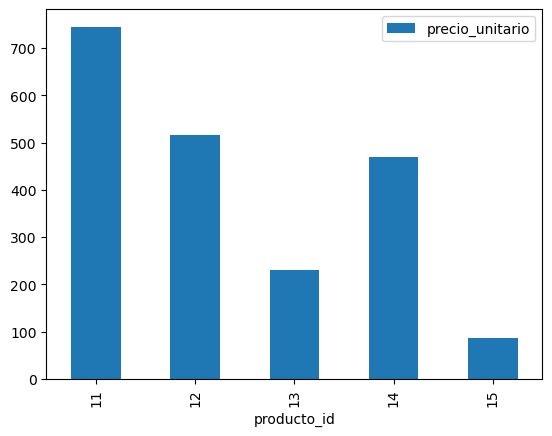

In [74]:
df = pd.read_csv("order_details.csv")
df = df[df["producto_id"].isin([11, 12, 13, 14, 15])]
df = df[["producto_id", "precio_unitario"]].groupby("producto_id").sum().reset_index()
df.plot.bar(x = "producto_id", y = "precio_unitario")
plt.show()

Histograma.

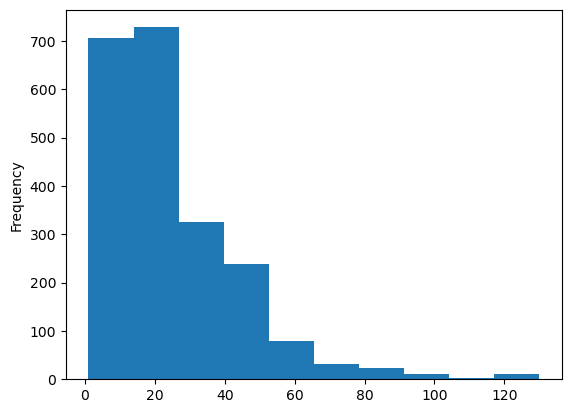

In [75]:
df = pd.read_csv("order_details.csv")
df["cantidad"].plot.hist()
plt.show()

Gráfico de linea.

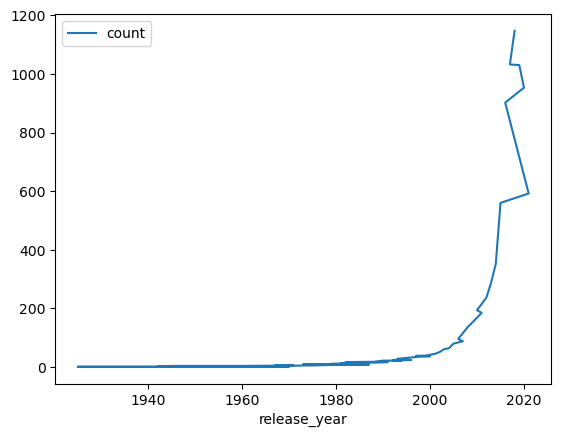

In [89]:
df = pd.read_csv("netflix_titles.csv")
df = df["release_year"].value_counts().to_frame().reset_index()

df.plot(x = "release_year", y = "count")
plt.show()

Boxplot

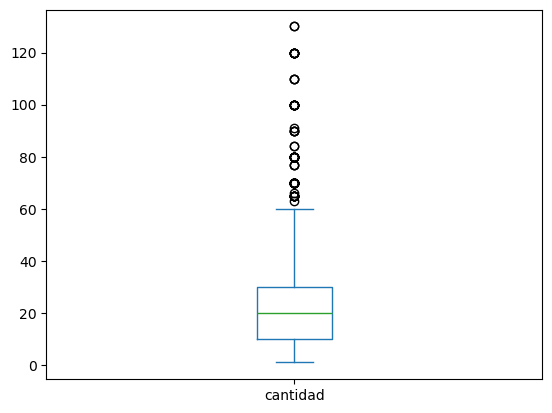

In [94]:
df = pd.read_csv("order_details.csv")

df[["cantidad"]].plot.box()

plt.show()